In [111]:
import pandas as pd
from math import sqrt
from sklearn.cluster import KMeans

In [112]:
dataset = pd.read_csv('Wine_dataset.csv')
dataset.head()

,Unnamed: 0,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


* Utilizaremos o número 4 como número arbitrário

In [113]:
agrupador = KMeans(n_clusters=4)
agrupador.fit(dataset)
labels = agrupador.labels_
print(labels)

[2 2 1 1 3 1 1 1 2 2 1 1 1 2 1 1 1 2 1 2 3 3 2 2 2 2 1 1 2 2 1 1 2 1 2 2 2
 2 2 3 3 2 2 3 2 2 2 2 2 1 2 1 1 1 2 2 2 1 1 0 3 0 3 0 0 3 0 0 3 3 2 0 0 2
 2 0 0 0 3 0 0 3 3 0 0 0 0 3 3 3 0 0 0 0 0 2 3 0 3 0 3 3 0 0 3 0 0 0 0 3 3
 0 3 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 3 3 0 3 3 3 3 3 0 3 3 3 3 0 0 2 3 0 3
 3 0 0 0 0 3 3 3 0 2 3 3 0 3 3 3 3 0 3 3 3 3 0 0 3 3 3 3 3 3]


In [114]:
distorcoes = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    distorcoes.append(kmeanModel.inertia_)

C:\Users\laris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



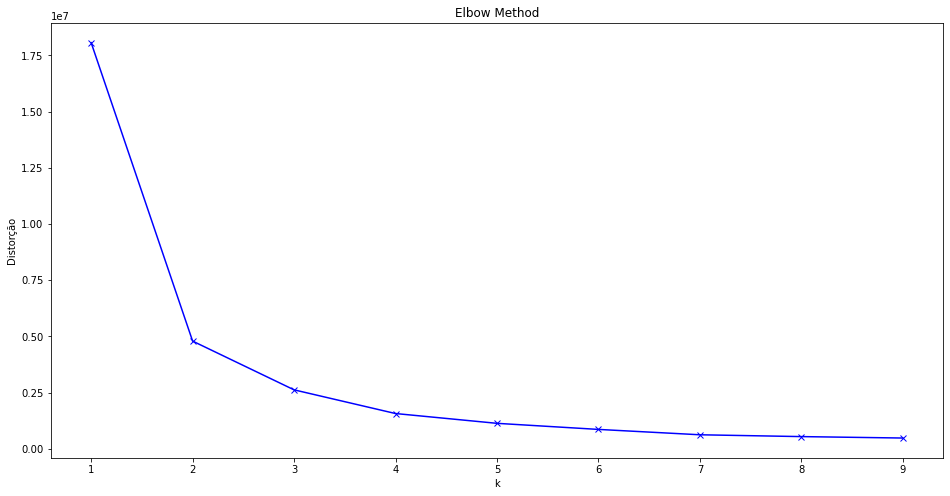

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16,8))
plt.plot(K,distorcoes,'bx-')
plt.xlabel('k')
plt.ylabel('Distorção')
plt.title('Elbow Method')
plt.show()

In [116]:
 from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_dataset = min_max_scaler.fit_transform(dataset)
np_dataset


array([[0.        , 0.84210526, 0.1916996 , ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.00564972, 0.57105263, 0.2055336 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.01129944, 0.56052632, 0.3201581 , ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.98870056, 0.58947368, 0.69960474, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.99435028, 0.56315789, 0.36561265, ..., 0.09756098, 0.12820513,
        0.40085592],
       [1.        , 0.81578947, 0.66403162, ..., 0.10569106, 0.12087912,
        0.20114123]])

C:\Users\laris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



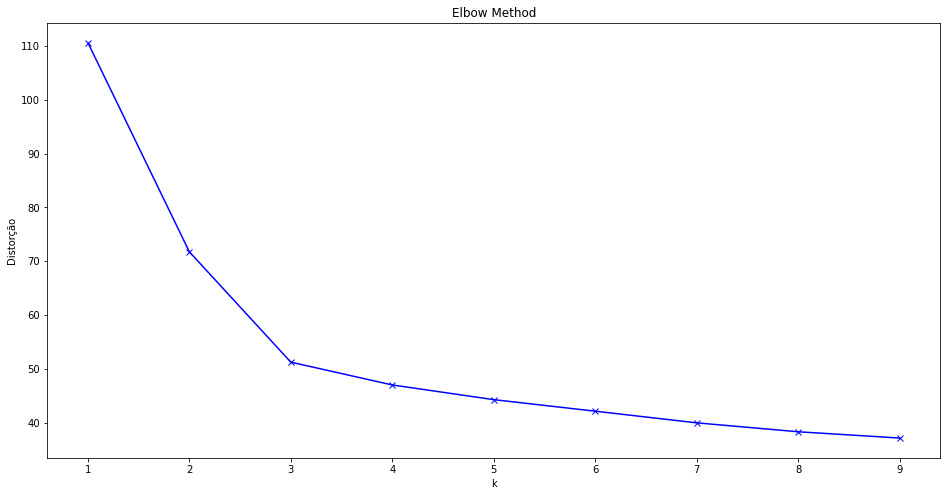

In [117]:
distorcoes = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(np_dataset)
    distorcoes.append(kmeanModel.inertia_)


plt.figure(figsize = (16,8))
plt.plot(K,distorcoes,'bx-')
plt.xlabel('k')
plt.ylabel('Distorção')
plt.title('Elbow Method')
plt.show()

In [118]:
from sklearn.decomposition import PCA
dados_pca = PCA(n_components =2).fit_transform(np_dataset)


In [119]:
agrupador = KMeans(n_clusters=3)
agrupador.fit(dados_pca)
labels = agrupador.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


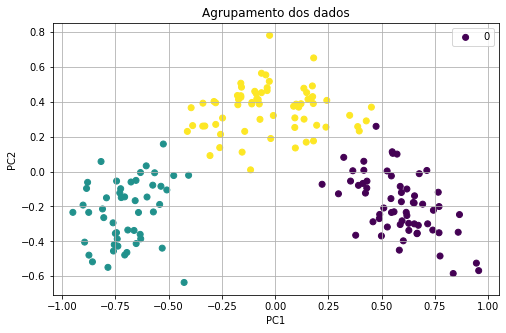

In [120]:
plt.figure(figsize=(8,5))


plt.title('Agrupamento dos dados')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(dados_pca[:,0], dados_pca[:,1], c=labels)
plt.legend(labels)
plt.grid(True)

plt.show()